In [1]:
import numpy as np
import pandas as pd
import sklearn.ensemble
import toolsets.auto_rt_pred as ap
import toolsets.data_prep as data_prep
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
import cleanlab
from sklearn.preprocessing import StandardScaler
import random
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict, cross_validate
from cleanlab.filter import find_label_issues
from autogluon.tabular import TabularDataset, TabularPredictor
%load_ext autoreload
%autoreload 2

Hi I am compiled version of the rt prediction using autogluon and mordred descriptor calculator
the usage is make_descriptors(data) and auto_rt_pred_with_descriptor(data, savepath)
the data is a dataframe with columns smiles, retention_time, and split_index (1 for training, 2 for test)
this function will returns a model
i am updated!


In [2]:
combined_data = pd.read_csv("data/multiRT/Combined dataset.csv")
hilic = combined_data.loc[combined_data['Column']=='HILIC']
hilic.reset_index(inplace=True, drop=True)

In [125]:
descriptors = pd.read_csv("data/multiRT/MultiRT_hilic_descriptors.csv", engine='python')
mixed_descriptors = descriptors.select_dtypes(exclude=['integer','floating','boolean'])

In [126]:
zero_descritptors = mixed_descriptors.apply(pd.to_numeric, errors='coerce',downcast='float')
zero_descritptors.fillna(0,inplace=True)

In [127]:
descriptors.update(zero_descritptors)
descriptors = descriptors.select_dtypes(exclude=['boolean'])
descriptors = descriptors.astype('float64')

In [128]:
descriptors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 836 entries, 0 to 835
Columns: 1611 entries, ABC to mZagreb2
dtypes: float64(1611)
memory usage: 10.3 MB


In [131]:
data = pd.concat([hilic, descriptors],axis =1)
data = data_prep.dataset_prep(data)

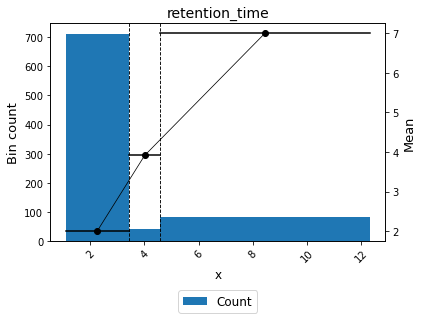

the distinct rt intervals are ['(-inf, 3.44)' '[3.44, 4.58)' '[4.58, inf)']


In [132]:
data_bin = data_prep.bin_retention_time(data,'retention_time',variable = 'retention_time', bin_method = "cart", min_diff = 1)

In [133]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
data_confirmed, data_suspicious = data_prep.mislabeled_handling(data_bin, clf)
data_confirmed = data_confirmed.drop(['retention_time_cat'], axis = 1)

In [139]:
data.to_csv("data/MultiRT/zero_version/hilic_data_raw.csv", index = False)
data_confirmed.to_csv("data/MultiRT/zero_version/hilic_data_confirmed.csv", index = False)

In [141]:
train, test = data_prep.make_train_test(data_confirmed)

In [143]:
ap.autogluon_fit_train_test (train, test, 'feature_engineered_models') 

Beginning AutoGluon training ...
AutoGluon will save models to "feature_engineered_models\"
AutoGluon Version:  0.4.0
Python Version:     3.9.12
Operating System:   Windows
Train Data Rows:    638
Train Data Columns: 1617
Label Column: retention_time
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (11.588571428571427, 1.0871428571428572, 2.52215, 1.62956)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    7538.31 MB
	Train Data (Original)  Memory Usage: 8.45 MB (0.1% of available memory)
	Inferring data type of each feature based on column values. Set featur

[1000]	valid_set's rmse: 0.500132
[2000]	valid_set's rmse: 0.484688
[3000]	valid_set's rmse: 0.483235


	-0.4832	 = Validation score   (root_mean_squared_error)
	8.01s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: LightGBM ...


[1000]	valid_set's rmse: 0.544362
[2000]	valid_set's rmse: 0.525755
[3000]	valid_set's rmse: 0.5194
[4000]	valid_set's rmse: 0.51674
[5000]	valid_set's rmse: 0.515693
[6000]	valid_set's rmse: 0.515261
[7000]	valid_set's rmse: 0.514844
[8000]	valid_set's rmse: 0.514633
[9000]	valid_set's rmse: 0.514578
[10000]	valid_set's rmse: 0.51455


	-0.5145	 = Validation score   (root_mean_squared_error)
	36.18s	 = Training   runtime
	0.05s	 = Validation runtime
Fitting model: RandomForestMSE ...
	-0.5666	 = Validation score   (root_mean_squared_error)
	5.29s	 = Training   runtime
	0.04s	 = Validation runtime
Fitting model: CatBoost ...
	-0.6445	 = Validation score   (root_mean_squared_error)
	484.23s	 = Training   runtime
	0.05s	 = Validation runtime
Fitting model: ExtraTreesMSE ...
	-0.6479	 = Validation score   (root_mean_squared_error)
	1.6s	 = Training   runtime
	0.04s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
	-1.1029	 = Validation score   (root_mean_squared_error)
	4.84s	 = Training   runtime
	0.55s	 = Validation runtime
Fitting model: XGBoost ...
	-0.3854	 = Validation score   (root_mean_squared_error)
	12.67s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: NeuralNetTorch ...
	-1.1365	 = Validation score   (root_mean_squared_error)
	3.58s	 = Training   runtime
	0.31s	 = Validation runtime


[1000]	valid_set's rmse: 0.569217
[2000]	valid_set's rmse: 0.562235
[3000]	valid_set's rmse: 0.559521
[4000]	valid_set's rmse: 0.559025
[5000]	valid_set's rmse: 0.558742
[6000]	valid_set's rmse: 0.558621
[7000]	valid_set's rmse: 0.558601
[8000]	valid_set's rmse: 0.558582
[9000]	valid_set's rmse: 0.558568
[10000]	valid_set's rmse: 0.558548


	-0.5585	 = Validation score   (root_mean_squared_error)
	144.66s	 = Training   runtime
	0.05s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ...
	-0.3821	 = Validation score   (root_mean_squared_error)
	0.19s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 707.73s ... Best model: "WeightedEnsemble_L2"
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("feature_engineered_models\")
Evaluation: root_mean_squared_error on test data: -0.38589621066394897
	Note: Scores are always higher_is_better. This metric score can be multiplied by -1 to get the metric value.
Evaluations on test data:
{
    "root_mean_squared_error": -0.38589621066394897,
    "mean_squared_error": -0.14891588540479483,
    "mean_absolute_error": -0.16756896815837471,
    "r2": 0.8818307575142841,
    "pearsonr": 0.9432148249089679,
    "median_absolute_error": -0.03943631989615304
}


*** Summary of fit() ***
Estimated performance of each model:
                  model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   WeightedEnsemble_L2  -0.382139       0.034008   20.870521                0.000000           0.194044            2       True         12
1               XGBoost  -0.385432       0.016003   12.668661                0.016003          12.668661            1       True          9
2            LightGBMXT  -0.483200       0.018005    8.007816                0.018005           8.007816            1       True          3
3              LightGBM  -0.514549       0.051011   36.176503                0.051011          36.176503            1       True          4
4         LightGBMLarge  -0.558548       0.052011  144.658660                0.052011         144.658660            1       True         11
5       RandomForestMSE  -0.566554       0.037009    5.285693                0.037009           5.

# mean descriptors

In [15]:
descriptors = pd.read_csv("data/multiRT/MultiRT_hilic_descriptors.csv", engine='python')
mixed_descriptors = descriptors.select_dtypes(exclude=['integer','floating','boolean'])

In [20]:
mean_descritptors = mixed_descriptors.apply(pd.to_numeric, errors='coerce',downcast='float')
# mean_descritptors.fillna(0,inplace=True)
# mean_descritptors = mean_descritptors.astype('float64')
mean_descritptors 

,AATS7dv,AATS8dv,AATS7d,AATS8d,AATS7s,AATS8s,AATS7Z,AATS8Z,AATS7m,AATS8m,...,MDEC-44,MDEO-11,MDEO-12,MDEO-22,MDEN-11,MDEN-12,MDEN-13,MDEN-22,MDEN-23,MDEN-33
0,1.043478,0.000000,1.652174,1.300000,2.681159,1.800000,7.652174,3.200000,22.348194,5.854464,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.043478,0.000000,1.652174,1.300000,2.681159,1.800000,7.652174,3.200000,22.348194,5.854464,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.043478,0.000000,1.652174,1.300000,2.681159,1.800000,7.652174,3.200000,22.348194,5.854464,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.043478,0.000000,1.652174,1.300000,2.681159,1.800000,7.652174,3.200000,22.348194,5.854464,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.043478,0.000000,1.652174,1.300000,2.681159,1.800000,7.652174,3.200000,22.348194,5.854464,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
831,2.242774,1.902439,2.242774,2.134146,2.672447,2.327236,12.254335,10.347561,41.331139,34.430214,...,NaN,0.814325,NaN,NaN,NaN,NaN,NaN,4.24264,0.421637,NaN
832,2.242774,1.902439,2.242774,2.134146,2.672447,2.327236,12.254335,10.347561,41.331139,34.430214,...,NaN,0.814325,NaN,NaN,NaN,NaN,NaN,4.24264,0.421637,NaN
833,2.242774,1.902439,2.242774,2.134146,2.672447,2.327236,12.254335,10.347561,41.331139,34.430214,...,NaN,0.814325,NaN,NaN,NaN,NaN,NaN,4.24264,0.421637,NaN
834,2.242774,1.902439,2.242774,2.134146,2.672447,2.327236,12.254335,10.347561,41.331139,34.430214,...,NaN,0.814325,NaN,NaN,NaN,NaN,NaN,4.24264,0.421637,NaN


In [21]:
for col in mean_descritptors.columns[0:]:
    col_mean = mean_descritptors[col].mean()
    mean_descritptors[col] = mean_descritptors[col].replace(np.nan, col_mean)
mean_descritptors.to_csv('mean_descritptors.csv')

,AATS7dv,AATS8dv,AATS7d,AATS8d,AATS7s,AATS8s,AATS7Z,AATS8Z,AATS7m,AATS8m,...,MDEC-44,MDEO-11,MDEO-12,MDEO-22,MDEN-11,MDEN-12,MDEN-13,MDEN-22,MDEN-23,MDEN-33
0,1.043478,0.000000,1.652174,1.300000,2.681159,1.800000,7.652174,3.200000,22.348194,5.854464,...,0.513875,0.650894,0.935013,1.218126,0.411765,0.811509,0.479806,2.234607,0.824821,0.670192
1,1.043478,0.000000,1.652174,1.300000,2.681159,1.800000,7.652174,3.200000,22.348194,5.854464,...,0.513875,0.650894,0.935013,1.218126,0.411765,0.811509,0.479806,2.234607,0.824821,0.670192
2,1.043478,0.000000,1.652174,1.300000,2.681159,1.800000,7.652174,3.200000,22.348194,5.854464,...,0.513875,0.650894,0.935013,1.218126,0.411765,0.811509,0.479806,2.234607,0.824821,0.670192
3,1.043478,0.000000,1.652174,1.300000,2.681159,1.800000,7.652174,3.200000,22.348194,5.854464,...,0.513875,0.650894,0.935013,1.218126,0.411765,0.811509,0.479806,2.234607,0.824821,0.670192
4,1.043478,0.000000,1.652174,1.300000,2.681159,1.800000,7.652174,3.200000,22.348194,5.854464,...,0.513875,0.650894,0.935013,1.218126,0.411765,0.811509,0.479806,2.234607,0.824821,0.670192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
831,2.242774,1.902439,2.242774,2.134146,2.672447,2.327236,12.254335,10.347561,41.331139,34.430214,...,0.513875,0.814325,0.935013,1.218126,0.411765,0.811509,0.479806,4.242640,0.421637,0.670192
832,2.242774,1.902439,2.242774,2.134146,2.672447,2.327236,12.254335,10.347561,41.331139,34.430214,...,0.513875,0.814325,0.935013,1.218126,0.411765,0.811509,0.479806,4.242640,0.421637,0.670192
833,2.242774,1.902439,2.242774,2.134146,2.672447,2.327236,12.254335,10.347561,41.331139,34.430214,...,0.513875,0.814325,0.935013,1.218126,0.411765,0.811509,0.479806,4.242640,0.421637,0.670192
834,2.242774,1.902439,2.242774,2.134146,2.672447,2.327236,12.254335,10.347561,41.331139,34.430214,...,0.513875,0.814325,0.935013,1.218126,0.411765,0.811509,0.479806,4.242640,0.421637,0.670192


In [22]:
descriptors.update(mean_descritptors)
descriptors = descriptors.select_dtypes(exclude=['boolean','object'])
descriptors = descriptors.astype('float64')
data = pd.concat([hilic, descriptors],axis =1)
data = data_prep.dataset_prep(data)

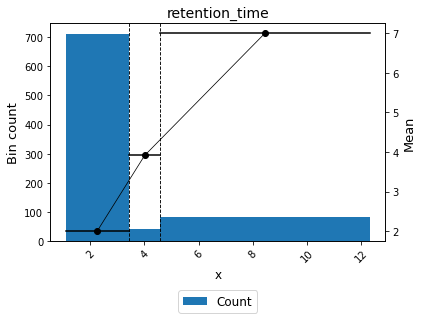

the distinct rt intervals are ['(-inf, 3.44)' '[3.44, 4.58)' '[4.58, inf)']


In [23]:
data_bin = data_prep.bin_retention_time(data,'retention_time',variable = 'retention_time', bin_method = "cart", min_diff = 1)

In [24]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
data_confirmed, data_suspicious = data_prep.mislabeled_handling(data_bin, clf)
data_confirmed = data_confirmed.drop(['retention_time_cat'], axis = 1)

i have passed cv!
Cleanlab found 42 potential label errors.


In [25]:
data.to_csv("data/MultiRT/mean_version/hilic_data_raw.csv", index = False)
data_confirmed.to_csv("data/MultiRT/mean_version/hilic_data_confirmed.csv", index = False)

In [26]:
train, test = data_prep.make_train_test(data_confirmed)

In [27]:
ap.autogluon_fit_train_test (train, test, 'feature_engineered_models_mean') 

Beginning AutoGluon training ...
AutoGluon will save models to "feature_engineered_models_mean\"
AutoGluon Version:  0.4.0
Python Version:     3.9.12
Operating System:   Windows
Train Data Rows:    636
Train Data Columns: 1330
Label Column: retention_time
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (11.588571428571427, 1.0871428571428572, 2.51549, 1.61379)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    6062.77 MB
	Train Data (Original)  Memory Usage: 6.97 MB (0.1% of available memory)
	Inferring data type of each feature based on column values. Set f

[1000]	valid_set's rmse: 0.466792


	-0.4655	 = Validation score   (root_mean_squared_error)
	2.28s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: LightGBM ...
	-0.4941	 = Validation score   (root_mean_squared_error)
	3.58s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: RandomForestMSE ...


[1000]	valid_set's rmse: 0.496498


	-0.5167	 = Validation score   (root_mean_squared_error)
	3.51s	 = Training   runtime
	0.03s	 = Validation runtime
Fitting model: CatBoost ...
	-0.4389	 = Validation score   (root_mean_squared_error)
	189.38s	 = Training   runtime
	0.04s	 = Validation runtime
Fitting model: ExtraTreesMSE ...
	-0.494	 = Validation score   (root_mean_squared_error)
	1.41s	 = Training   runtime
	0.04s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
	-1.08	 = Validation score   (root_mean_squared_error)
	2.91s	 = Training   runtime
	0.45s	 = Validation runtime
Fitting model: XGBoost ...
	-0.4036	 = Validation score   (root_mean_squared_error)
	13.04s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: NeuralNetTorch ...
	-1.0667	 = Validation score   (root_mean_squared_error)
	3.27s	 = Training   runtime
	0.29s	 = Validation runtime
Fitting model: LightGBMLarge ...
	-0.4545	 = Validation score   (root_mean_squared_error)
	10.93s	 = Training   runtime
	0.02s	 = Validation runtime
Fitt

*** Summary of fit() ***
Estimated performance of each model:
                  model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   WeightedEnsemble_L2  -0.364851       0.092021  208.498204                0.000000           0.215049            2       True         12
1               XGBoost  -0.403602       0.024005   13.044140                0.024005          13.044140            1       True          9
2              CatBoost  -0.438900       0.039009  189.382289                0.039009         189.382289            1       True          6
3         LightGBMLarge  -0.454476       0.017004   10.925461                0.017004          10.925461            1       True         11
4            LightGBMXT  -0.465486       0.015003    2.276917                0.015003           2.276917            1       True          3
5         ExtraTreesMSE  -0.493973       0.038008    1.412406                0.038008           1.

	Note: Scores are always higher_is_better. This metric score can be multiplied by -1 to get the metric value.
Evaluations on test data:
{
    "root_mean_squared_error": -0.37783383397848974,
    "mean_squared_error": -0.14275840609888504,
    "mean_absolute_error": -0.170224461671313,
    "r2": 0.896309147557784,
    "pearsonr": 0.9469719861031289,
    "median_absolute_error": -0.042083891119275796
}


{'root_mean_squared_error': -0.37783383397848974, 'mean_squared_error': -0.14275840609888504, 'mean_absolute_error': -0.170224461671313, 'r2': 0.896309147557784, 'pearsonr': 0.9469719861031289, 'median_absolute_error': -0.042083891119275796}


# median descriptors

In [28]:
descriptors = pd.read_csv("data/multiRT/MultiRT_hilic_descriptors.csv", engine='python')
mixed_descriptors = descriptors.select_dtypes(exclude=['integer','floating','boolean'])

In [31]:
median_descritptors = mixed_descriptors.apply(pd.to_numeric, errors='coerce',downcast='float')
median_descritptors

,AATS7dv,AATS8dv,AATS7d,AATS8d,AATS7s,AATS8s,AATS7Z,AATS8Z,AATS7m,AATS8m,...,MDEC-44,MDEO-11,MDEO-12,MDEO-22,MDEN-11,MDEN-12,MDEN-13,MDEN-22,MDEN-23,MDEN-33
0,1.043478,0.000000,1.652174,1.300000,2.681159,1.800000,7.652174,3.200000,22.348194,5.854464,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.043478,0.000000,1.652174,1.300000,2.681159,1.800000,7.652174,3.200000,22.348194,5.854464,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.043478,0.000000,1.652174,1.300000,2.681159,1.800000,7.652174,3.200000,22.348194,5.854464,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.043478,0.000000,1.652174,1.300000,2.681159,1.800000,7.652174,3.200000,22.348194,5.854464,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.043478,0.000000,1.652174,1.300000,2.681159,1.800000,7.652174,3.200000,22.348194,5.854464,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
831,2.242774,1.902439,2.242774,2.134146,2.672447,2.327236,12.254335,10.347561,41.331139,34.430214,...,NaN,0.814325,NaN,NaN,NaN,NaN,NaN,4.24264,0.421637,NaN
832,2.242774,1.902439,2.242774,2.134146,2.672447,2.327236,12.254335,10.347561,41.331139,34.430214,...,NaN,0.814325,NaN,NaN,NaN,NaN,NaN,4.24264,0.421637,NaN
833,2.242774,1.902439,2.242774,2.134146,2.672447,2.327236,12.254335,10.347561,41.331139,34.430214,...,NaN,0.814325,NaN,NaN,NaN,NaN,NaN,4.24264,0.421637,NaN
834,2.242774,1.902439,2.242774,2.134146,2.672447,2.327236,12.254335,10.347561,41.331139,34.430214,...,NaN,0.814325,NaN,NaN,NaN,NaN,NaN,4.24264,0.421637,NaN


In [30]:
for col in median_descritptors.columns[0:]:
    col_median = median_descritptors[col].median()
    median_descritptors[col] = median_descritptors[col].replace(np.nan, col_median)
median_descritptors.to_csv('median_descritptors.csv')
median_descritptors

,AATS7dv,AATS8dv,AATS7d,AATS8d,AATS7s,AATS8s,AATS7Z,AATS8Z,AATS7m,AATS8m,...,MDEC-44,MDEO-11,MDEO-12,MDEO-22,MDEN-11,MDEN-12,MDEN-13,MDEN-22,MDEN-23,MDEN-33
0,1.043478,0.000000,1.652174,1.300000,2.681159,1.800000,7.652174,3.200000,22.348194,5.854464,...,0.25,0.500000,0.825482,1.5,0.25,0.412741,0.5,2.381102,0.500000,0.5
1,1.043478,0.000000,1.652174,1.300000,2.681159,1.800000,7.652174,3.200000,22.348194,5.854464,...,0.25,0.500000,0.825482,1.5,0.25,0.412741,0.5,2.381102,0.500000,0.5
2,1.043478,0.000000,1.652174,1.300000,2.681159,1.800000,7.652174,3.200000,22.348194,5.854464,...,0.25,0.500000,0.825482,1.5,0.25,0.412741,0.5,2.381102,0.500000,0.5
3,1.043478,0.000000,1.652174,1.300000,2.681159,1.800000,7.652174,3.200000,22.348194,5.854464,...,0.25,0.500000,0.825482,1.5,0.25,0.412741,0.5,2.381102,0.500000,0.5
4,1.043478,0.000000,1.652174,1.300000,2.681159,1.800000,7.652174,3.200000,22.348194,5.854464,...,0.25,0.500000,0.825482,1.5,0.25,0.412741,0.5,2.381102,0.500000,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
831,2.242774,1.902439,2.242774,2.134146,2.672447,2.327236,12.254335,10.347561,41.331139,34.430214,...,0.25,0.814325,0.825482,1.5,0.25,0.412741,0.5,4.242640,0.421637,0.5
832,2.242774,1.902439,2.242774,2.134146,2.672447,2.327236,12.254335,10.347561,41.331139,34.430214,...,0.25,0.814325,0.825482,1.5,0.25,0.412741,0.5,4.242640,0.421637,0.5
833,2.242774,1.902439,2.242774,2.134146,2.672447,2.327236,12.254335,10.347561,41.331139,34.430214,...,0.25,0.814325,0.825482,1.5,0.25,0.412741,0.5,4.242640,0.421637,0.5
834,2.242774,1.902439,2.242774,2.134146,2.672447,2.327236,12.254335,10.347561,41.331139,34.430214,...,0.25,0.814325,0.825482,1.5,0.25,0.412741,0.5,4.242640,0.421637,0.5


In [32]:
descriptors.update(median_descritptors)
descriptors = descriptors.select_dtypes(exclude=['boolean','object'])
descriptors = descriptors.astype('float64')
data = pd.concat([hilic, descriptors],axis =1)
data = data_prep.dataset_prep(data)

In [33]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
data_confirmed, data_suspicious = data_prep.mislabeled_handling(data_bin, clf)
data_confirmed = data_confirmed.drop(['retention_time_cat'], axis = 1)

i have passed cv!
Cleanlab found 41 potential label errors.


In [34]:
data.to_csv("data/MultiRT/median_version/hilic_data_raw.csv", index = False)
data_confirmed.to_csv("data/MultiRT/median_version/hilic_data_confirmed.csv", index = False)

In [35]:
train, test = data_prep.make_train_test(data_confirmed)

In [36]:
ap.autogluon_fit_train_test (train, test, 'feature_engineered_models_median') 

Beginning AutoGluon training ...
AutoGluon will save models to "feature_engineered_models_median\"
AutoGluon Version:  0.4.0
Python Version:     3.9.12
Operating System:   Windows
Train Data Rows:    637
Train Data Columns: 1330
Label Column: retention_time
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (11.588571428571427, 1.0871428571428572, 2.52383, 1.63494)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    6041.31 MB
	Train Data (Original)  Memory Usage: 6.98 MB (0.1% of available memory)
	Inferring data type of each feature based on column values. Set

[1000]	valid_set's rmse: 0.42994
[2000]	valid_set's rmse: 0.427653


	-0.4252	 = Validation score   (root_mean_squared_error)
	4.16s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: LightGBM ...


[1000]	valid_set's rmse: 0.41949


	-0.4194	 = Validation score   (root_mean_squared_error)
	4.51s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: RandomForestMSE ...
	-0.4444	 = Validation score   (root_mean_squared_error)
	3.48s	 = Training   runtime
	0.03s	 = Validation runtime
Fitting model: CatBoost ...
	-0.4067	 = Validation score   (root_mean_squared_error)
	187.6s	 = Training   runtime
	0.04s	 = Validation runtime
Fitting model: ExtraTreesMSE ...
	-0.4128	 = Validation score   (root_mean_squared_error)
	1.44s	 = Training   runtime
	0.04s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
	-0.919	 = Validation score   (root_mean_squared_error)
	2.75s	 = Training   runtime
	0.42s	 = Validation runtime
Fitting model: XGBoost ...
	-0.2952	 = Validation score   (root_mean_squared_error)
	10.77s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: NeuralNetTorch ...
	-0.9742	 = Validation score   (root_mean_squared_error)
	2.3s	 = Training   runtime
	0.2s	 = Validation runtime
Fitt

*** Summary of fit() ***
Estimated performance of each model:
                  model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   WeightedEnsemble_L2  -0.275307       0.083018   19.947774                0.001000           0.247057            2       True         12
1               XGBoost  -0.295230       0.013002   10.771411                0.013002          10.771411            1       True          9
2              CatBoost  -0.406664       0.040009  187.595163                0.040009         187.595163            1       True          6
3         ExtraTreesMSE  -0.412778       0.035008    1.440272                0.035008           1.440272            1       True          7
4              LightGBM  -0.419354       0.011002    4.505034                0.011002           4.505034            1       True          4
5            LightGBMXT  -0.425210       0.015004    4.158708                0.015004           4.

Evaluation: root_mean_squared_error on test data: -0.4565106858728858
	Note: Scores are always higher_is_better. This metric score can be multiplied by -1 to get the metric value.
Evaluations on test data:
{
    "root_mean_squared_error": -0.4565106858728858,
    "mean_squared_error": -0.20840200631613276,
    "mean_absolute_error": -0.18747171298562215,
    "r2": 0.8425708096313698,
    "pearsonr": 0.9241670426072777,
    "median_absolute_error": -0.04493602275848385
}


{'root_mean_squared_error': -0.4565106858728858, 'mean_squared_error': -0.20840200631613276, 'mean_absolute_error': -0.18747171298562215, 'r2': 0.8425708096313698, 'pearsonr': 0.9241670426072777, 'median_absolute_error': -0.04493602275848385}


# classifier based descriptors

In [4]:
descriptors = pd.read_csv("data/multiRT/MultiRT_hilic_descriptors.csv", engine='python')
mixed_descriptors = descriptors.select_dtypes(exclude=['integer','floating','boolean'])
numeric_descriptors = descriptors.select_dtypes(exclude=['object','boolean'])

In [5]:
cb_descriptors = mixed_descriptors.apply(pd.to_numeric, errors='coerce',downcast='float')
cb_descriptors.dropna(axis = 1, how = 'all', inplace = True)
cb_descriptors

,AATS7dv,AATS8dv,AATS7d,AATS8d,AATS7s,AATS8s,AATS7Z,AATS8Z,AATS7m,AATS8m,...,MDEC-44,MDEO-11,MDEO-12,MDEO-22,MDEN-11,MDEN-12,MDEN-13,MDEN-22,MDEN-23,MDEN-33
0,1.043478,0.000000,1.652174,1.300000,2.681159,1.800000,7.652174,3.200000,22.348194,5.854464,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.043478,0.000000,1.652174,1.300000,2.681159,1.800000,7.652174,3.200000,22.348194,5.854464,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.043478,0.000000,1.652174,1.300000,2.681159,1.800000,7.652174,3.200000,22.348194,5.854464,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.043478,0.000000,1.652174,1.300000,2.681159,1.800000,7.652174,3.200000,22.348194,5.854464,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.043478,0.000000,1.652174,1.300000,2.681159,1.800000,7.652174,3.200000,22.348194,5.854464,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
831,2.242774,1.902439,2.242774,2.134146,2.672447,2.327236,12.254335,10.347561,41.331139,34.430214,...,NaN,0.814325,NaN,NaN,NaN,NaN,NaN,4.24264,0.421637,NaN
832,2.242774,1.902439,2.242774,2.134146,2.672447,2.327236,12.254335,10.347561,41.331139,34.430214,...,NaN,0.814325,NaN,NaN,NaN,NaN,NaN,4.24264,0.421637,NaN
833,2.242774,1.902439,2.242774,2.134146,2.672447,2.327236,12.254335,10.347561,41.331139,34.430214,...,NaN,0.814325,NaN,NaN,NaN,NaN,NaN,4.24264,0.421637,NaN
834,2.242774,1.902439,2.242774,2.134146,2.672447,2.327236,12.254335,10.347561,41.331139,34.430214,...,NaN,0.814325,NaN,NaN,NaN,NaN,NaN,4.24264,0.421637,NaN


In [6]:
for col in range (len(cb_descriptors.columns)):
    subset = cb_descriptors.iloc[:, col]
    y_train = []
    x_train = pd.DataFrame()
    x_test = pd.DataFrame()
    for row in range (len(subset)):
        label = cb_descriptors.iloc[row, col]
        if pd.isnull(cb_descriptors.iloc[row, col]) == False:
            y_train.append(label)
            x_train_new = numeric_descriptors.iloc[row, :]
            x_train = x_train.append(x_train_new, ignore_index=True)
        else:
            x_test_new = numeric_descriptors.iloc[row,:]
            x_test = x_test.append(x_test_new, ignore_index=True)
    clf = RandomForestRegressor()
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    count = 0
    for row_2 in range (len(subset)):
        if pd.isnull(cb_descriptors.iloc[row_2, col]) == True:
            cb_descriptors.iloc[row_2, col] = y_pred[count]
            count +=1
cb_descriptors.to_csv('cb_descriptors.csv')  

In [9]:
descriptors.update(cb_descriptors)
descriptors = descriptors.select_dtypes(exclude=['boolean', 'object'])
descriptors = descriptors.astype('float64')
data = pd.concat([hilic, descriptors],axis =1)
data = data_prep.dataset_prep(data)

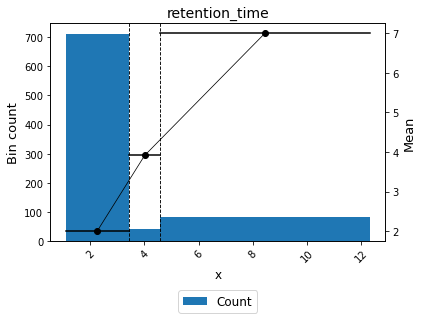

the distinct rt intervals are ['(-inf, 3.44)' '[3.44, 4.58)' '[4.58, inf)']


In [10]:
data_bin = data_prep.bin_retention_time(data,'retention_time',variable = 'retention_time', bin_method = "cart", min_diff = 1)

In [11]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
data_confirmed, data_suspicious = data_prep.mislabeled_handling(data_bin, clf)
data_confirmed = data_confirmed.drop(['retention_time_cat'], axis = 1)

i have passed cv!
Cleanlab found 40 potential label errors.


In [12]:
data.to_csv("data/MultiRT/classifier_based_version/hilic_data_raw.csv", index = False)
data_confirmed.to_csv("data/MultiRT/classifier_based_version/hilic_data_confirmed.csv", index = False)

In [13]:
train, test = data_prep.make_train_test(data_confirmed)

In [14]:
ap.autogluon_fit_train_test (train, test, 'feature_engineered_models_mean') 

Beginning AutoGluon training ...
AutoGluon will save models to "feature_engineered_models_mean\"
AutoGluon Version:  0.4.0
Python Version:     3.9.12
Operating System:   Windows
Train Data Rows:    638
Train Data Columns: 1330
Label Column: retention_time
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (11.588571428571427, 1.0871428571428572, 2.53283, 1.63377)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    6017.95 MB
	Train Data (Original)  Memory Usage: 6.99 MB (0.1% of available memory)
	Inferring data type of each feature based on column values. Set f

[1000]	valid_set's rmse: 0.874588


	-0.8725	 = Validation score   (root_mean_squared_error)


[2000]	valid_set's rmse: 0.873073


	6.36s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: RandomForestMSE ...
	-0.8789	 = Validation score   (root_mean_squared_error)
	3.73s	 = Training   runtime
	0.04s	 = Validation runtime
Fitting model: CatBoost ...
	-0.8693	 = Validation score   (root_mean_squared_error)
	77.97s	 = Training   runtime
	0.04s	 = Validation runtime
Fitting model: ExtraTreesMSE ...
	-0.9516	 = Validation score   (root_mean_squared_error)
	1.47s	 = Training   runtime
	0.04s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
No improvement since epoch 7: early stopping
	-1.2826	 = Validation score   (root_mean_squared_error)
	4.1s	 = Training   runtime
	0.45s	 = Validation runtime
Fitting model: XGBoost ...
	-0.8352	 = Validation score   (root_mean_squared_error)
	9.84s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: NeuralNetTorch ...
	-1.2416	 = Validation score   (root_mean_squared_error)
	3.1s	 = Training   runtime
	0.22s	 = Validation runtime
Fitting model: L

[1000]	valid_set's rmse: 0.857497


	-0.8567	 = Validation score   (root_mean_squared_error)
	25.86s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ...
	-0.8317	 = Validation score   (root_mean_squared_error)
	0.21s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 138.88s ... Best model: "WeightedEnsemble_L2"
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("feature_engineered_models_mean\")
Evaluation: root_mean_squared_error on test data: -0.3063567059144597


*** Summary of fit() ***
Estimated performance of each model:
                  model  score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   WeightedEnsemble_L2  -0.831694       0.042010  42.256819                0.000000           0.208050            2       True         12
1               XGBoost  -0.835219       0.014002   9.838072                0.014002           9.838072            1       True          9
2         LightGBMLarge  -0.856685       0.014004  25.855382                0.014004          25.855382            1       True         11
3              CatBoost  -0.869259       0.037537  77.965412                0.037537          77.965412            1       True          6
4              LightGBM  -0.872476       0.014003   6.355314                0.014003           6.355314            1       True          4
5       RandomForestMSE  -0.878853       0.036009   3.733844                0.036009           3.733844 

	Note: Scores are always higher_is_better. This metric score can be multiplied by -1 to get the metric value.
Evaluations on test data:
{
    "root_mean_squared_error": -0.3063567059144597,
    "mean_squared_error": -0.09385443125875878,
    "mean_absolute_error": -0.13149278466337916,
    "r2": 0.9226974588855721,
    "pearsonr": 0.9609640892114772,
    "median_absolute_error": -0.029589683668954092
}


{'root_mean_squared_error': -0.3063567059144597, 'mean_squared_error': -0.09385443125875878, 'mean_absolute_error': -0.13149278466337916, 'r2': 0.9226974588855721, 'pearsonr': 0.9609640892114772, 'median_absolute_error': -0.029589683668954092}
